In [1]:
from __future__ import absolute_import

import numpy as np
import tensorflow as tf
import math
import matplotlib.pyplot as plt
%matplotlib inline

/Users/ZweNaing/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
train_X = np.load('data/fer2013/train_X.npy')
validation_X = np.load('data/fer2013/validation_X.npy')
test_X = np.load('data/fer2013/denoised_test_X.npy')

In [3]:
train_y = np.load('data/fer2013/train_y.npy')
validation_y = np.load('data/fer2013/validation_y.npy')
test_y = np.load('data/fer2013/test_y.npy')

In [29]:
train_X = train_X.reshape([-1, 48 * 48])
validation_X = validation_X.reshape([-1, 48 * 48])
test_X = test_X.reshape([-1, 48 * 48])

In [32]:
%%time
from sklearn.svm import SVC

clf = SVC()
clf = clf.fit(train_X, train_y)
pred = clf.predict(validation_X)
print("Train Score ", clf.score(train_X, train_y))
print("Validation Error ", clf.score(validation_X, validation_y))
print("Test Error ", clf.score(test_X, test_y))

Train Score  0.9984325472848236


Validation Error  0.3142936751184174


Test Error  0.31819448314293675
CPU times: user 3h 4min 15s, sys: 47.9 s, total: 3h 5min 3s
Wall time: 3h 6min 14s


In [13]:
train_n,d = train_X.shape
validation_n, d = validation_X.shape
test_n, d = test_X.shape
#train_X = np.array([[int(j) for j in train_X[i].split(' ')] for i in range(train_n)])
#validation_X = np.array([[int(j) for j in validation_X[i].split(' ')] for i in range(validation_n)])
#test_X = np.array([[int(j) for j in test_X[i].split(' ')] for i in range(test_n)])

## Preprocessing

### Image Display

Emotion:  Happy


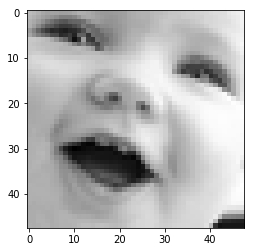

In [23]:
i = 10
emotions = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]
plt.imshow(test_X[i].reshape([48, 48]), cmap='gray')
print("Emotion: ", emotions[test_y[i]])

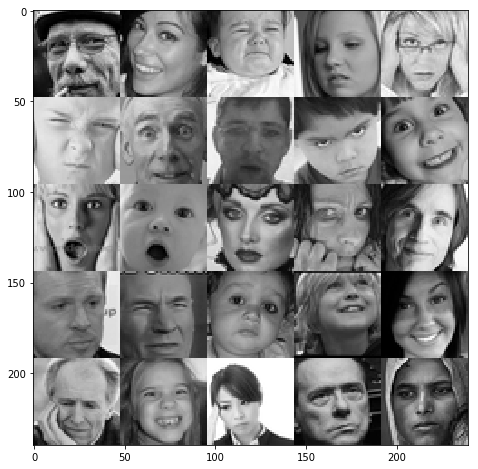

In [6]:
display_n = 5
i = 0
offset = i * display_n * display_n
#display_data = test_X[- offset : offset + display_n * display_n, :]
display_data = test_X[-display_n * display_n:, :]
canvas = np.empty((48 * display_n, 48 * display_n))
for i in range(display_n * display_n):
    p = i // display_n
    q = i % display_n
    image = display_data[i, :].reshape(48, 48)
    canvas[p * 48 : (p + 1) * 48, q * 48 : (q + 1) * 48] = image
plt.figure(figsize=(8, 8))
plt.imshow(canvas,cmap='gray')

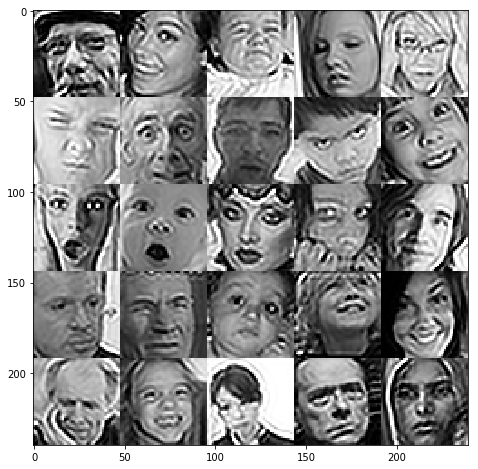

In [4]:
display_n = 5
i = 0
offset = i * display_n * display_n
#display_data = test_X[- offset : offset + display_n * display_n, :]
display_data = test_X[-display_n * display_n:, :]
canvas = np.empty((48 * display_n, 48 * display_n))
for i in range(display_n * display_n):
    p = i // display_n
    q = i % display_n
    image = display_data[i, :].reshape(48, 48)
    canvas[p * 48 : (p + 1) * 48, q * 48 : (q + 1) * 48] = image
plt.figure(figsize=(8, 8))
plt.imshow(canvas,cmap='gray')

### Per Image Standardization

Text(0.5,1,'Per Image and Per Pixel Standardization')

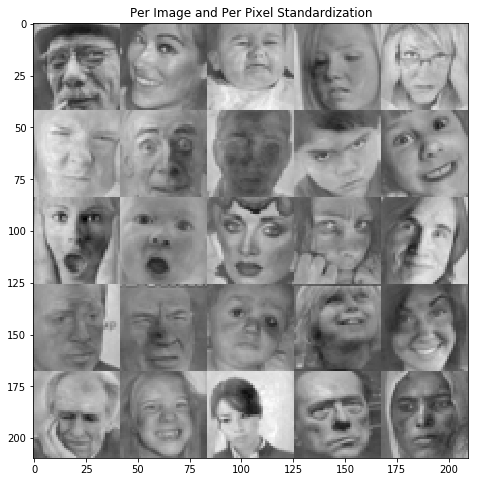

In [24]:
sess = tf.InteractiveSession()
display_n = 5
display_data = test_X[-display_n * display_n:, :]
canvas = np.empty((42 * display_n, 42 * display_n))
for i in range(display_n * display_n):
    p = i // display_n
    q = i % display_n
    image = tf.image.per_image_standardization(display_data[i, :].reshape(42, 42, 1))
    image = standardized_data[i, :]
    canvas[p * 42 : (p + 1) * 42, q * 42 : (q + 1) * 42] = tf.reshape(image, [42, 42]).eval()
plt.figure(figsize=(8, 8))
plt.imshow(canvas,cmap='gray')
plt.title(("Per Image and Per Pixel Standardization"))

Text(0.5,1,'Per Image and Per Pixel Standardization')

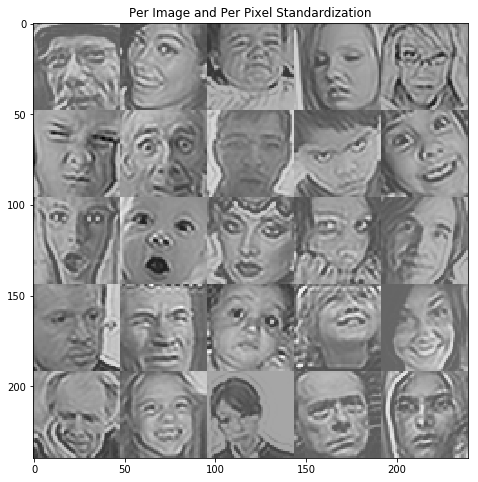

In [8]:
sess = tf.InteractiveSession()
display_n = 5
display_data = test_X[-display_n * display_n:, :]
canvas = np.empty((48 * display_n, 48 * display_n))
for i in range(display_n * display_n):
    p = i // display_n
    q = i % display_n
    image = tf.image.per_image_standardization(display_data[i, :].reshape(48, 48, 1))
    #image = standardized_data[i, :]
    canvas[p * 48 : (p + 1) * 48, q * 48 : (q + 1) * 48] = tf.reshape(image, [48, 48]).eval()
plt.figure(figsize=(8, 8))
plt.imshow(canvas,cmap='gray')
plt.title(("Per Image and Per Pixel Standardization"))

### Per pixel standardization

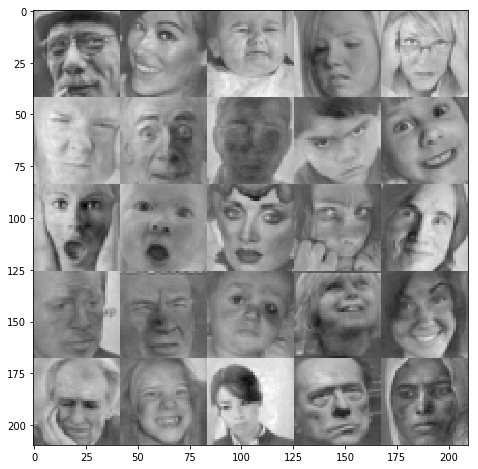

In [21]:
from sklearn.preprocessing import scale
sess = tf.InteractiveSession()
display_n = 5
display_data = test_X[- display_n * display_n:, :]
standardized_data = scale(display_data, axis=0)

canvas = np.empty((42 * display_n, 42 * display_n))
for i in range(display_n * display_n):
    p = i // display_n
    q = i % display_n
    image = standardized_data[i, :].reshape(42, 42)
    canvas[p * 42 : (p + 1) * 42, q * 42 : (q + 1) * 42] = image
plt.figure(figsize=(8, 8))
plt.imshow(canvas,cmap='gray')

### Image Random Flip

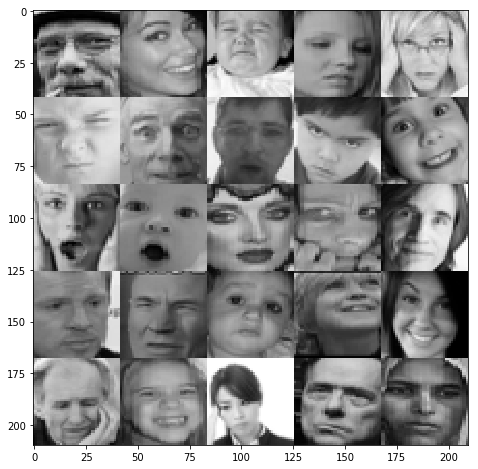

In [25]:
sess = tf.InteractiveSession()
display_n = 5
crop_size = 42
display_data = test_X[- display_n * display_n:, :]
canvas = np.empty((42 * display_n, 42 * display_n))
for i in range(display_n * display_n):
    p = i // display_n
    q = i % display_n
    #image = tf.image.random_flip_left_right(display_data[i, :].reshape(42, 42, 1))
    #image = tf.keras.preprocessing.image.random_rotation(tf.reshape(image, (42, 42, 1)), 45)
    image = tf.keras.preprocessing.image.random_rotation(display_data[i, :].reshape([42, 42, 1]), 45)
    image = tf.image.random_flip_left_right(image)
    rescaled_size = np.random.randint(43, 54)
    offset = np.random.randint(0, rescaled_size - crop_size)
    rescaled_image = tf.image.resize_images(image, [rescaled_size, rescaled_size])
    cropped_image = tf.image.crop_to_bounding_box(rescaled_image, offset, offset, crop_size, crop_size)
    canvas[p * 42 : (p + 1) * 42, q * 42 : (q + 1) * 42] = tf.reshape(image, [42, 42]).eval()
plt.figure(figsize=(8, 8))
plt.imshow(canvas,cmap='gray')

### Image Random Rotation

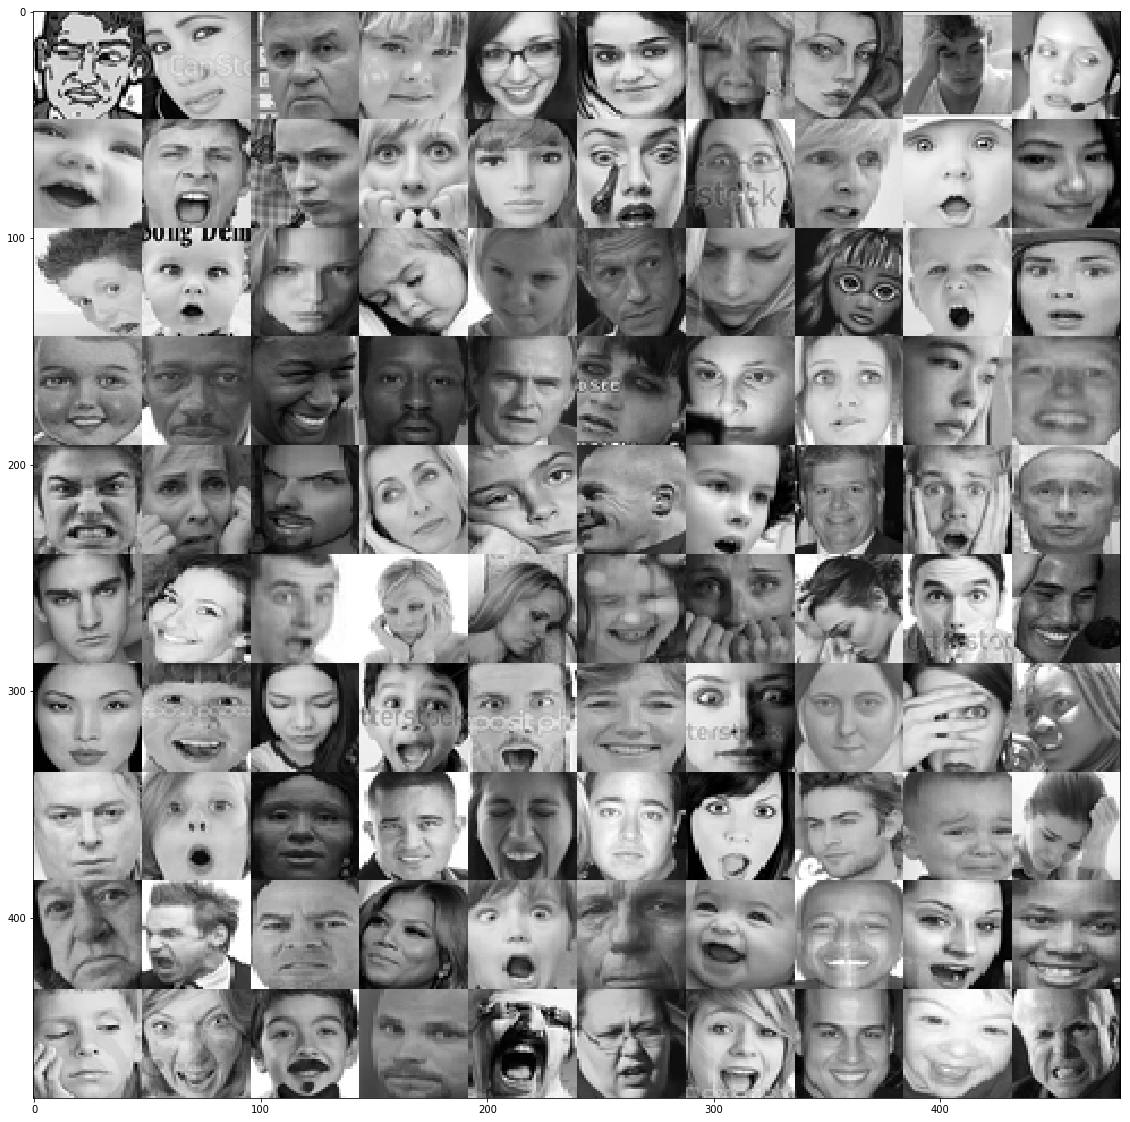

In [15]:
sess = tf.InteractiveSession()
display_n = 10
display_data = test_X[:display_n * display_n, :]
canvas = np.empty((48 * display_n, 48 * display_n))
for i in range(display_n * display_n):
    p = i // display_n
    q = i % display_n
    image = tf.keras.preprocessing.image.random_rotation(display_data[i, :].reshape([48, 48, 1]), 45) 
    canvas[p * 48 : (p + 1) * 48, q * 48 : (q + 1) * 48] = tf.reshape(image, [48, 48]).eval()
plt.figure(figsize=(20, 20))
plt.imshow(canvas,cmap='gray')

### Image Random Crop 

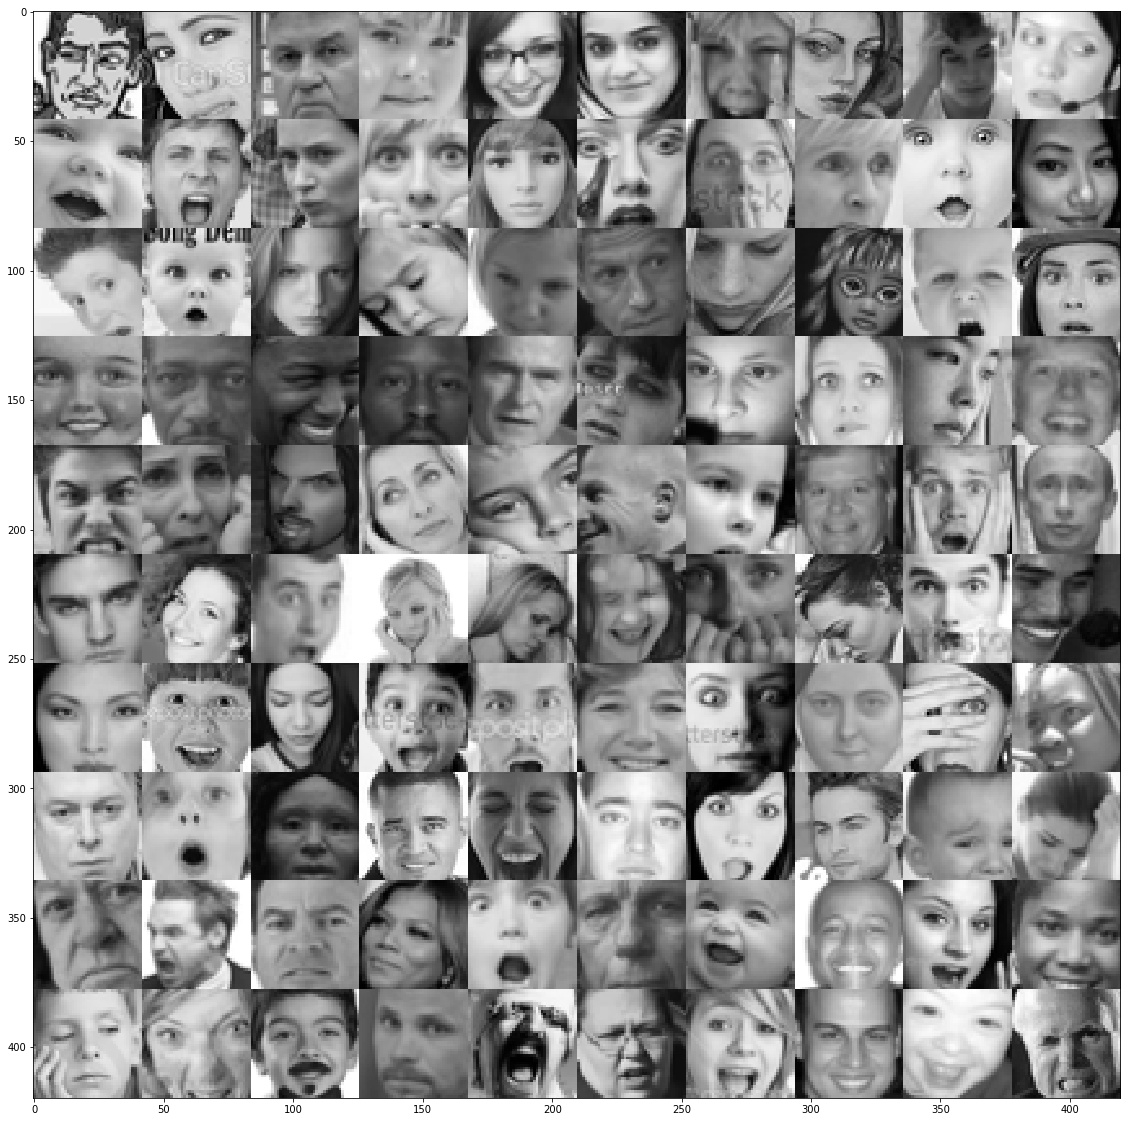

In [183]:
sess = tf.InteractiveSession()
crop_size = 42
display_n = 10
display_data = test_X[:display_n * display_n, :]
canvas = np.empty((42 * display_n, 42 * display_n))
for i in range(display_n * display_n):
    p = i // display_n
    q = i % display_n
    image = test_X[i, :].reshape([48, 48, 1])
    rescaled_size = np.random.randint(43, 54)
    offset = np.random.randint(0, rescaled_size - crop_size)
    rescaled_image = tf.image.resize_images(image, [rescaled_size, rescaled_size])
    cropped_image = tf.image.crop_to_bounding_box(rescaled_image, offset, offset, crop_size, crop_size)
    canvas[p * 42 : (p + 1) * 42, q * 42 : (q + 1) * 42] = tf.reshape(cropped_image, [42, 42]).eval()
plt.figure(figsize=(20, 20))
plt.imshow(canvas,cmap='gray')

In [3]:
from emotion_classification.input_data import augment_images

In [4]:
test_x = np.load("data/fer2013/normalized_train_X.npy")

In [5]:
test_x[0, :].shape

(2304,)

In [10]:
tf.InteractiveSession()
image = augment_images(test_x[1, :], 1)[0]
image = tf.reshape(image, [42, 42])

In [11]:
image = image.eval()

In [11]:
image.shape

(42, 42)

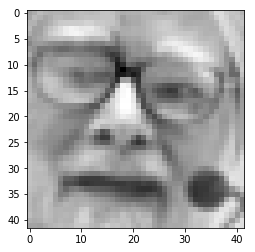

In [13]:
plt.imshow(image, cmap='gray')